# 📌 Extracción




In [ ]:
import pandas as pd
import numpy as np

df = pd.read_json("TelecomX_Data.json")
df

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


#🔧 Transformación

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [ ]:
df.dtypes

,0
customerID,object
Churn,object
customer,object
phone,object
internet,object
account,object


In [ ]:
df.columns

Index(['customerID', 'Churn', 'customer', 'phone', 'internet', 'account'], dtype='object')

In [ ]:
# Normalizando el DataFrame

df_customer = pd.json_normalize(df['customer'])
df_phone = pd.json_normalize(df['phone'])
df_internet = pd.json_normalize(df['internet'])
df_account = pd.json_normalize(df['account'])

# Eliminar columnas originaes y unir todos los DataFrame por columna
df = pd.concat(
    [df.drop(columns=['customer', 'phone', 'internet', 'account']),
     df_customer, df_phone, df_internet, df_account],
    axis=1
)

df

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [ ]:
for col in df.columns:
  print(f"Valores unicos en la columna'{col}: {df[col].nunique()}'")

  if df[col].nunique() < 50:
    print(df[col].unique())
    print('-' * 24)

Valores unicos en la columna'customerID: 7267'
Valores unicos en la columna'Churn: 3'
['No' 'Yes' '']
------------------------
Valores unicos en la columna'gender: 2'
['Female' 'Male']
------------------------
Valores unicos en la columna'SeniorCitizen: 2'
[0 1]
------------------------
Valores unicos en la columna'Partner: 2'
['Yes' 'No']
------------------------
Valores unicos en la columna'Dependents: 2'
['Yes' 'No']
------------------------
Valores unicos en la columna'tenure: 73'
Valores unicos en la columna'PhoneService: 2'
['Yes' 'No']
------------------------
Valores unicos en la columna'MultipleLines: 3'
['No' 'Yes' 'No phone service']
------------------------
Valores unicos en la columna'InternetService: 3'
['DSL' 'Fiber optic' 'No']
------------------------
Valores unicos en la columna'OnlineSecurity: 3'
['No' 'Yes' 'No internet service']
------------------------
Valores unicos en la columna'OnlineBackup: 3'
['Yes' 'No' 'No internet service']
------------------------
Valores

### Valores nulos

In [ ]:
df.isnull().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


### Valores duplicados

In [ ]:
duplicados = df.duplicated().sum()
duplicados

np.int64(0)

### Valores vacios

In [ ]:
df.apply(lambda x: x.astype(str).str.strip() == '').sum()

,0
customerID,0
Churn,224
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


### Cambiando la columna "Charges.Total" de Object a Float.

In [ ]:
df['Charges.Total'] = df['Charges.Total'].apply(pd.to_numeric, errors='coerce')
print(df['Charges.Total'].dtype)

float64


### Eliminar registros con Churn vacío.

In [ ]:
df.Churn.value_counts()
df.apply(lambda x: x.astype(str).str.strip() == '').sum()
df = df[df['Churn'] != '']

df.Churn.value_counts()

,count
Churn,
No,5174
Yes,1869


### Borramos nulos

In [ ]:
df = df.dropna(subset=['Charges.Total'])

### Creamos columna "Cuentas_diarias".

In [ ]:
df['Cuentas_diarias']= df['Charges.Monthly']/30
df['Cuentas_diarias']
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


In [ ]:
print(df.isnull().sum())

customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
Cuentas_diarias     0
dtype: int64


In [ ]:
for col in df.select_dtypes(include='object').columns:
    print(f"\n{col}:", df[col].unique())


customerID: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']

Churn: ['No' 'Yes']

gender: ['Female' 'Male']

Partner: ['Yes' 'No']

Dependents: ['Yes' 'No']

PhoneService: ['Yes' 'No']

MultipleLines: ['No' 'Yes' 'No phone service']

InternetService: ['DSL' 'Fiber optic' 'No']

OnlineSecurity: ['No' 'Yes' 'No internet service']

OnlineBackup: ['Yes' 'No' 'No internet service']

DeviceProtection: ['No' 'Yes' 'No internet service']

TechSupport: ['Yes' 'No' 'No internet service']

StreamingTV: ['Yes' 'No' 'No internet service']

StreamingMovies: ['No' 'Yes' 'No internet service']

Contract: ['One year' 'Month-to-month' 'Two year']

PaperlessBilling: ['Yes' 'No']

PaymentMethod: ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']


#### Convirtiendo valores "si" y "no" en binarios.

In [ ]:
bin_map = {'Yes': 1, 'No': 0}

cols_binarias = [
    'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling'
]

for col in cols_binarias:
    df[col] = df[col].map(bin_map)

In [ ]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

### Renombramos/traducimos las columnas.

In [ ]:
df = df.rename(columns={
    'customerID': 'ID_cliente',
    'Churn': 'Cancelacion',
    'gender': 'Genero',
    'SeniorCitizen': 'Ciudadano_mayor',
    'Partner': 'Tiene_pareja',
    'Dependents': 'Tiene_dependientes',
    'tenure': 'Antiguedad_meses',
    'PhoneService': 'Servicio_telefonico',
    'MultipleLines': 'Multiples_lineas',
    'InternetService': 'Tipo_internet',
    'OnlineSecurity': 'Seguridad_en_linea',
    'OnlineBackup': 'Copia_seguridad',
    'DeviceProtection': 'Proteccion_dispositivo',
    'TechSupport': 'Soporte_tecnico',
    'StreamingTV': 'TV_streaming',
    'StreamingMovies': 'Peliculas_streaming',
    'Contract': 'Tipo_contrato',
    'PaperlessBilling': 'Facturacion_sin_papel',
    'PaymentMethod': 'Metodo_pago',
    'Charges.Monthly': 'Cargos_mensuales',
    'Charges.Total': 'Cargos_totales',
    'Cuentas_diarias': 'Costo_diario'
})

In [ ]:
df.head()

,ID_cliente,Cancelacion,Genero,Ciudadano_mayor,Tiene_pareja,Tiene_dependientes,Antiguedad_meses,Servicio_telefonico,Multiples_lineas,Tipo_internet,...,Proteccion_dispositivo,Soporte_tecnico,TV_streaming,Peliculas_streaming,Tipo_contrato,Facturacion_sin_papel,Metodo_pago,Cargos_mensuales,Cargos_totales,Costo_diario
0,0002-ORFBO,0,Female,0,1,1,9,1,0.0,DSL,...,0.0,1.0,1.0,0.0,One year,1,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,1,1.0,DSL,...,0.0,0.0,0.0,1.0,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1,Male,0,0,0,4,1,0.0,Fiber optic,...,1.0,0.0,0.0,0.0,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1,Male,1,1,0,13,1,0.0,Fiber optic,...,1.0,0.0,1.0,1.0,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1,Female,1,1,0,3,1,0.0,Fiber optic,...,0.0,1.0,1.0,0.0,Month-to-month,1,Mailed check,83.9,267.40,2.796667


#📊 Carga y análisis

### Análisis Descriptivo

In [ ]:
df.describe().round(2)

,Cancelacion,Ciudadano_mayor,Tiene_pareja,Tiene_dependientes,Antiguedad_meses,Servicio_telefonico,Multiples_lineas,Seguridad_en_linea,Copia_seguridad,Proteccion_dispositivo,Soporte_tecnico,TV_streaming,Peliculas_streaming,Facturacion_sin_papel,Cargos_mensuales,Cargos_totales,Costo_diario
count,7032.00,7032.00,7032.00,7032.00,7032.00,7032.0,6352.00,5512.00,5512.00,5512.00,5512.00,5512.00,5512.0,7032.00,7032.00,7032.00,7032.00
mean,0.27,0.16,0.48,0.30,32.42,0.9,0.47,0.37,0.44,0.44,0.37,0.49,0.5,0.59,64.80,2283.30,2.16
std,0.44,0.37,0.50,0.46,24.55,0.3,0.50,0.48,0.50,0.50,0.48,0.50,0.5,0.49,30.09,2266.77,1.00
min,0.00,0.00,0.00,0.00,1.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,18.25,18.80,0.61
25%,0.00,0.00,0.00,0.00,9.00,1.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,35.59,401.45,1.19
50%,0.00,0.00,0.00,0.00,29.00,1.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,1.00,70.35,1397.48,2.34
75%,1.00,0.00,1.00,1.00,55.00,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.0,1.00,89.86,3794.74,3.00
max,1.00,1.00,1.00,1.00,72.00,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.0,1.00,118.75,8684.80,3.96


In [ ]:
print("🔹 Cargos totales:")
print("Media:", df['Cargos_totales'].mean())
print("Mediana:", df['Cargos_totales'].median())
print("Desviación estándar:", df['Cargos_totales'].std())
print("Mínimo:", df['Cargos_totales'].min())
print("Máximo:", df['Cargos_totales'].max())

🔹 Cargos totales:
Media: 2283.3004408418656
Mediana: 1397.475
Desviación estándar: 2266.771361883145
Mínimo: 18.8
Máximo: 8684.8


In [ ]:
print("🔹 Cargos mensuales:")
print("Media:", df['Cargos_mensuales'].mean())
print("Mediana:", df['Cargos_mensuales'].median())
print("Desviación estándar:", df['Cargos_mensuales'].std())
print("Mínimo:", df['Cargos_mensuales'].min())
print("Máximo:", df['Cargos_mensuales'].max())

🔹 Cargos mensuales:
Media: 64.79820819112628
Mediana: 70.35
Desviación estándar: 30.085973884049906
Mínimo: 18.25
Máximo: 118.75


In [ ]:
print("🔹 Costo diario:")
print("Media:", df['Costo_diario'].mean())
print("Mediana:", df['Costo_diario'].median())
print("Desviación estándar:", df['Costo_diario'].std())
print("Mínimo:", df['Costo_diario'].min())
print("Máximo:", df['Costo_diario'].max())

🔹 Costo diario:
Media: 2.1599402730375425
Mediana: 2.3449999999999998
Desviación estándar: 1.0028657961349958
Mínimo: 0.6083333333333333
Máximo: 3.9583333333333335


#### Proporción de clientes según su edad.

In [ ]:

resumen_edad = df['Ciudadano_mayor'].value_counts().to_frame(name='Total')

resumen_edad['Porcentaje'] = (df['Ciudadano_mayor'].value_counts(normalize=True) * 100).round(2).astype(str) + ' %'

resumen_edad['Total'] = resumen_edad['Total'].map('{:,}'.format)
resumen_edad

,Total,Porcentaje
Ciudadano_mayor,,
0,"5,890",83.76 %
1,"1,142",16.24 %


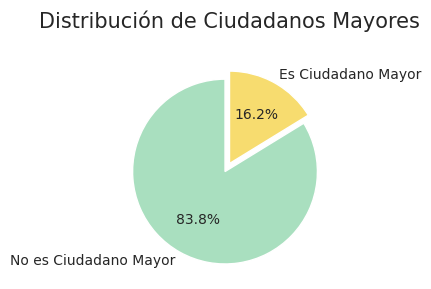

In [ ]:
import matplotlib.pyplot as plt

#datos
data_edad = df['Ciudadano_mayor'].value_counts()

# gráfico
plt.figure(figsize=(3, 3))
plt.pie(data_edad,
        labels=['No es Ciudadano Mayor', 'Es Ciudadano Mayor'], # Etiquetas descriptivas
        autopct='%1.1f%%',
        startangle=90,
        colors=['#A9DFBF', '#F7DC6F'], # Verde suave y Amarillo
        explode=(0.1, 0)) # Resalta la categoría menor

plt.title('Distribución de Ciudadanos Mayores', fontsize=15, pad=15)
plt.show()

### Proporción de clientes según su género.

In [ ]:
resumen_gen = df['Genero'].value_counts().to_frame('Total').assign(
    Porcentaje = lambda x: (x['Total'] / x['Total'].sum() * 100).map('{:,.2f} %'.format),
    Total = lambda x: x['Total'].map('{:,.0f}'.format)
)
resumen_gen

,Total,Porcentaje
Genero,,
Male,"3,549",50.47 %
Female,"3,483",49.53 %


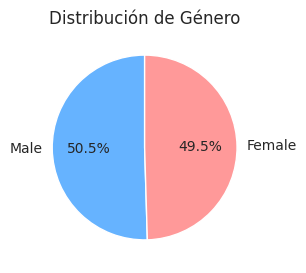

In [ ]:
import matplotlib.pyplot as plt

# datos
data = df['Genero'].value_counts()

# grafico
plt.figure(figsize=(3, 3))
data.plot.pie(autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#ff9999'],)
plt.title('Distribución de Género')
plt.ylabel('')
plt.show()

# Distribución de Evasión

In [ ]:
total_evasion = df['Cancelacion'].value_counts()
total_porcentaje = df['Cancelacion'].value_counts(normalize=True)*100

resultados = pd.DataFrame({
    'Total': total_evasion,
    'Porcentaje': total_porcentaje
})
resultados['Total'] = resultados['Total'].apply(lambda x: f'{x:,.0f}')
resultados['Porcentaje'] = resultados['Porcentaje'].apply(lambda x: f'{x:.1f}%')

resultados.index.name = 'Cancelacion'

resultados

,Total,Porcentaje
Cancelacion,,
0,"5,163",73.4%
1,"1,869",26.6%


In [ ]:
df.groupby('Cancelacion')[['Cargos_mensuales', 'Cargos_totales', 'Costo_diario', 'Antiguedad_meses']].describe().round(2)

Cargos_mensuales                                            \
                       count   mean    std    min    25%    50%    75%   
Cancelacion                                                              
0                     5163.0  61.31  31.09  18.25  25.10  64.45  88.48   
1                     1869.0  74.44  24.67  18.85  56.15  79.65  94.20   

                    Cargos_totales           ... Costo_diario        \
                max          count     mean  ...          75%   max   
Cancelacion                                  ...                      
0            118.75         5163.0  2555.34  ...         2.95  3.96   
1            118.35         1869.0  1531.80  ...         3.14  3.94   

            Antiguedad_meses                                             
                       count   mean    std  min   25%   50%   75%   max  
Cancelacion                                                              
0                     5163.0  37.65  24.08  1.0  15.0  38.0  61.0  72.0  
1                     1869.0  17.98  19.53  1.0   2.0  10.0  29.0  72.0  

[2 rows x 32 columns]

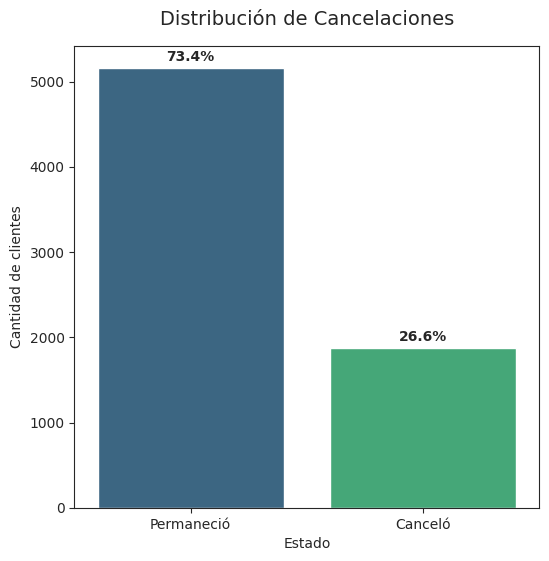

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

sns.set_style("ticks")
plt.figure(figsize=(6, 6))

ax = sns.barplot(x=total_evasion.index, y=total_evasion.values, palette='viridis')

for i, p in enumerate(ax.patches):
    ax.annotate(f'{total_porcentaje.values[i]:.1f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom',
                xytext=(0, 3),
                textcoords='offset points',
                fontweight='bold')

plt.title('Distribución de Cancelaciones', fontsize=14, pad=15)
plt.ylabel('Cantidad de clientes')
plt.xlabel('Estado')
plt.xticks(ticks=[0, 1], labels=['Permaneció', 'Canceló'])

plt.show()

### Cancelación por antigüedad

In [ ]:

resumen_grupos = df.groupby('Cancelacion')['Antiguedad_meses'].describe().T

resumen = df.groupby('Cancelacion')['Antiguedad_meses'].describe().T
resumen['General'] = df['Antiguedad_meses'].describe()
resumen = resumen.rename(columns={0: 'Permaneció', 1: 'Canceló'})
print(resumen)

Cancelacion  Permaneció      Canceló      General
count        5163.00000  1869.000000  7032.000000
mean           37.65001    17.979133    32.421786
std            24.07694    19.531123    24.545260
min             1.00000     1.000000     1.000000
25%            15.00000     2.000000     9.000000
50%            38.00000    10.000000    29.000000
75%            61.00000    29.000000    55.000000
max            72.00000    72.000000    72.000000


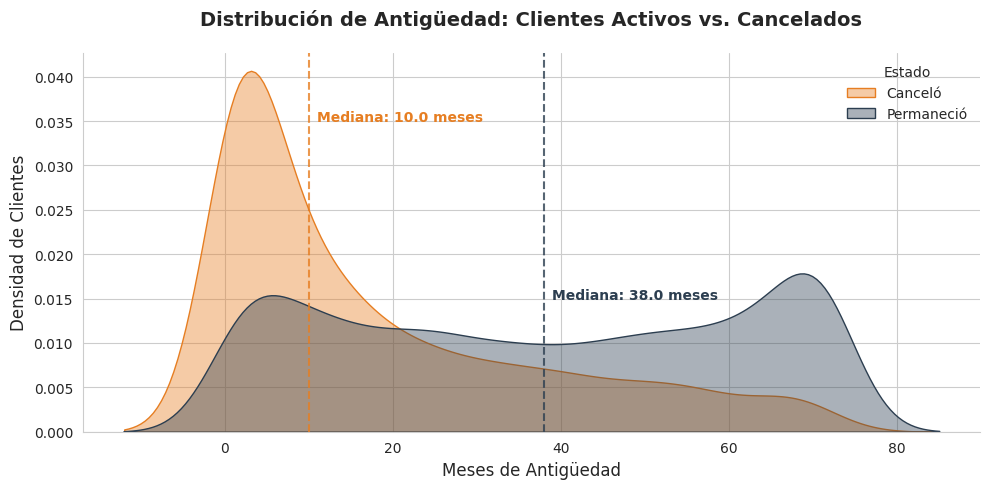

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")
plt.figure(figsize=(10, 5))

colores = {0: '#2c3e50', 1: '#e67e22'}

sns.kdeplot(data=df, x='Antiguedad_meses', hue='Cancelacion',
            fill=True, palette=colores, common_norm=False, alpha=0.4)

plt.title('Distribución de Antigüedad: Clientes Activos vs. Cancelados',
          fontsize=14, weight='bold', pad=20)
plt.xlabel('Meses de Antigüedad', fontsize=12)
plt.ylabel('Densidad de Clientes', fontsize=12)

plt.legend(title='Estado', labels=['Canceló', 'Permaneció'], frameon=False)

mediana_perm = df[df['Cancelacion']==0]['Antiguedad_meses'].median()
mediana_canc = df[df['Cancelacion']==1]['Antiguedad_meses'].median()

plt.axvline(mediana_perm, color='#2c3e50', linestyle='--', alpha=0.8)
plt.axvline(mediana_canc, color='#e67e22', linestyle='--', alpha=0.8)

plt.text(mediana_perm + 1, 0.015, f'Mediana: {mediana_perm} meses', color='#2c3e50', fontweight='bold')
plt.text(mediana_canc + 1, 0.035, f'Mediana: {mediana_canc} meses', color='#e67e22', fontweight='bold')

sns.despine()
plt.tight_layout()
plt.show()

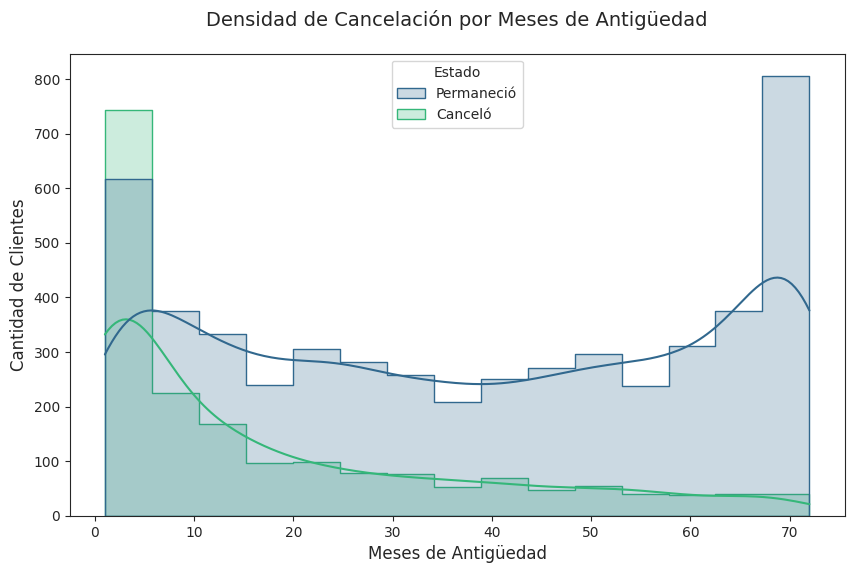

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


df_plot = df.copy()
df_plot['Estado'] = df_plot['Cancelacion'].map({0: 'Permaneció', 1: 'Canceló'})

plt.figure(figsize=(10, 6))
sns.set_style("ticks")

sns.histplot(
    data=df_plot,
    x='Antiguedad_meses',
    hue='Estado',
    kde=True,
    palette='viridis',
    element="step"
)

plt.title('Densidad de Cancelación por Meses de Antigüedad', fontsize=14, pad=20)
plt.xlabel('Meses de Antigüedad', fontsize=12)
plt.ylabel('Cantidad de Clientes', fontsize=12)

plt.show()

### Tiempo de antiguedad en el que ocurre la cancelación.

In [ ]:
bins = [0, 6, 12, 24, 36, 48, 72]
labels = ['0–6m', '7–12m', '13–24m', '25–36m', '37–48m', '49–72m']


churn_rate = (
    df.assign(Antiguedad_bin = pd.cut(df['Antiguedad_meses'], bins=bins, labels=labels, include_lowest=True))
    .groupby('Antiguedad_bin', observed=True)['Cancelacion']
    .mean().reset_index()
)

churn_rate

,Antiguedad_bin,Cancelacion
0,0–6m,0.533333
1,7–12m,0.358865
2,13–24m,0.287109
3,25–36m,0.216346
4,37–48m,0.190289
5,49–72m,0.095132


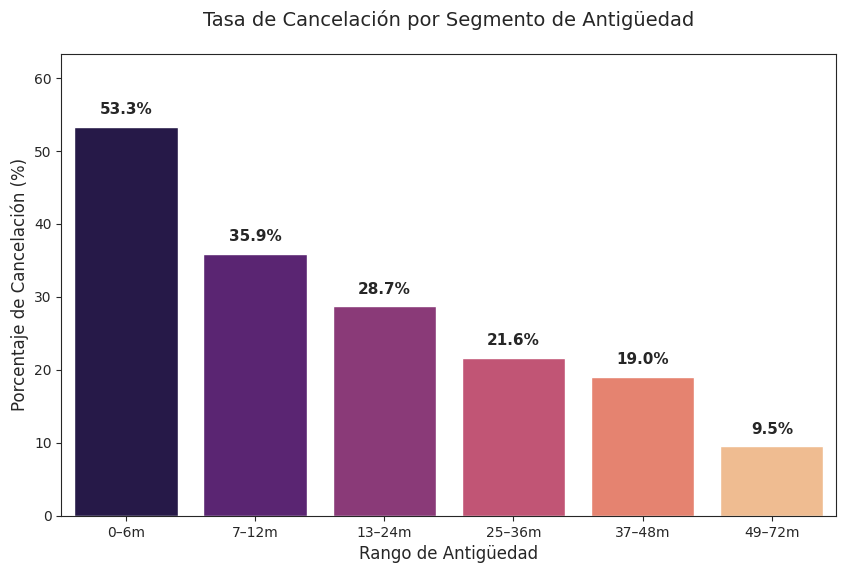

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

grafico_data = churn_rate.copy()
if grafico_data['Cancelacion'].max() <= 1:
    grafico_data['Cancelacion'] = grafico_data['Cancelacion'] * 100

plt.figure(figsize=(10, 6))
sns.set_style("ticks")

ax = sns.barplot(
    x='Antiguedad_bin',
    y='Cancelacion',
    data=grafico_data,
    palette='magma',
    hue='Antiguedad_bin',
    legend=False
)


for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1f}%',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom',
                xytext=(0, 7),
                textcoords='offset points',
                fontweight='bold',
                fontsize=11)

plt.title('Tasa de Cancelación por Segmento de Antigüedad', fontsize=14, pad=20)
plt.ylabel('Porcentaje de Cancelación (%)', fontsize=12)
plt.xlabel('Rango de Antigüedad', fontsize=12)

plt.ylim(0, grafico_data['Cancelacion'].max() + 10)

plt.show()

### Cancelación por tipo de contrato.

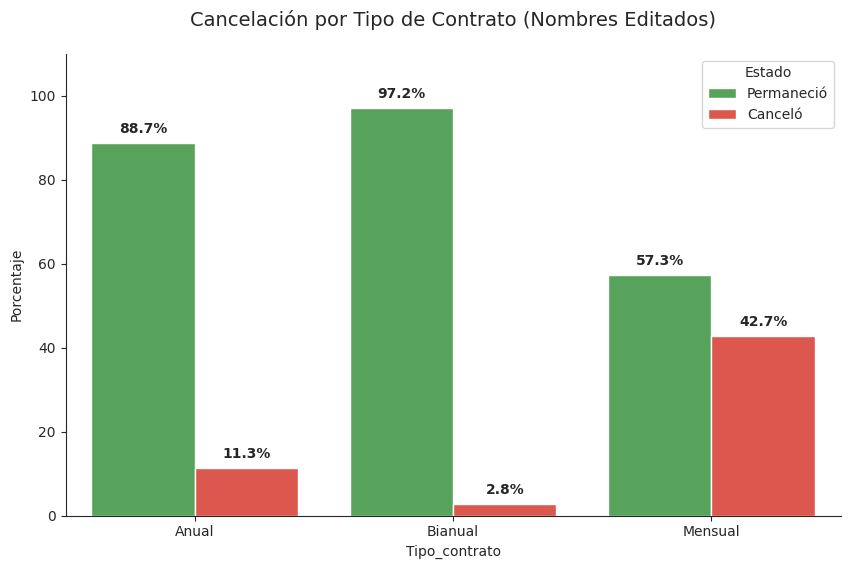

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


mapa_contratos = {
    'Month-to-month': 'Mensual',
    'One year': 'Anual',
    'Two year': 'Bianual'
}


df_limpio = df[df['Cancelacion'] != -1].copy()
df_limpio['Tipo_contrato'] = df_limpio['Tipo_contrato'].map(mapa_contratos)


df_plot = pd.crosstab(
    df_limpio['Tipo_contrato'],
    df_limpio['Cancelacion'],
    normalize='index'
).mul(100).reset_index()

df_plot = df_plot.rename(columns={0: 'Permaneció', 1: 'Canceló'})
df_melted = df_plot.melt(id_vars='Tipo_contrato', var_name='Estado', value_name='Porcentaje')

plt.figure(figsize=(10, 6))
sns.set_style("ticks")

ax = sns.barplot(
    data=df_melted,
    x='Tipo_contrato',
    y='Porcentaje',
    hue='Estado',
    palette=['#4CAF50', '#F44336']
)

for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(f'{p.get_height():.1f}%',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom',
                    xytext=(0, 5), textcoords='offset points',
                    fontweight='bold')

plt.title('Cancelación por Tipo de Contrato (Nombres Editados)', fontsize=14, pad=20)
plt.grid(False)
sns.despine()
plt.ylim(0, 110)
plt.show()

### Cancelación por género.

In [ ]:
genero_cancel = pd.crosstab(df['Genero'], df['Cancelacion'], normalize='index')
genero_cancel.index = genero_cancel.index.map({'Female': 'Femenino', 'Male': 'Masculino'})
genero_cancel.columns = ['Permaneció', 'Canceló']

(genero_cancel.style
    .format('{:.2%}')
    .background_gradient(cmap='Reds', subset=['Canceló'])
    .set_properties(**{'text-align': 'center', 'border': '1px solid #eee'}))

,Permaneció,Canceló
Genero,,
Femenino,73.04%,26.96%
Masculino,73.80%,26.20%


### Cancelación por método de pago.

In [ ]:
traduccion_pagos = {
    'Electronic check': 'Cheque electrónico',
    'Mailed check': 'Cheque por correo',
    'Bank transfer (automatic)': 'Transferencia bancaria',
    'Credit card (automatic)': 'Tarjeta de crédito'
}

metodoPago_cancel = pd.crosstab(
    df['Metodo_pago'].map(traduccion_pagos),
    df['Cancelacion'],
    normalize='index'
)


metodoPago_cancel.columns = ['No Desertó', 'Desertó']

metodoPago_cancel = metodoPago_cancel.sort_values(by='Desertó', ascending=False)

metodoPago_cancel

,No Desertó,Desertó
Metodo_pago,,
Cheque electrónico,0.547146,0.452854
Cheque por correo,0.807980,0.192020
Transferencia bancaria,0.832685,0.167315
Tarjeta de crédito,0.847469,0.152531


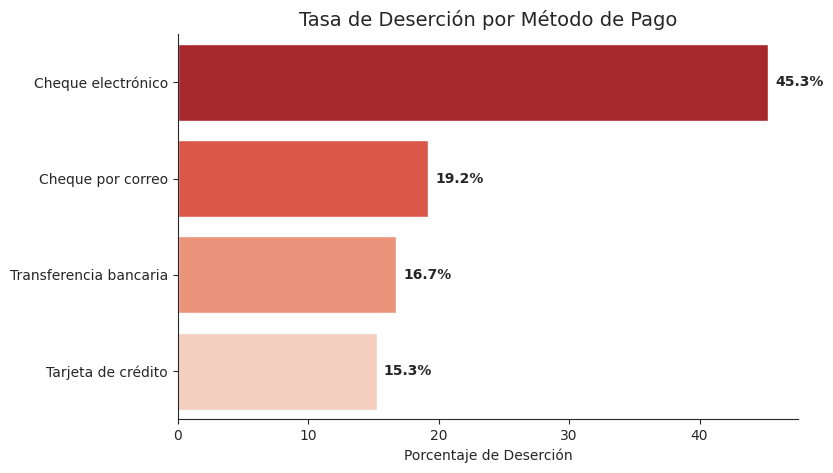

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.set_style("ticks")

ax = sns.barplot(
    x=metodoPago_cancel['Desertó'] * 100,
    y=metodoPago_cancel.index,
    palette='Reds_r'
)

for p in ax.patches:
    ax.annotate(f'{p.get_width():.1f}%',
                (p.get_width(), p.get_y() + p.get_height() / 2.),
                ha='left', va='center',
                xytext=(5, 0), textcoords='offset points',
                fontweight='bold')

plt.title('Tasa de Deserción por Método de Pago', fontsize=14)
plt.xlabel('Porcentaje de Deserción')
plt.ylabel('')
plt.grid(False)
sns.despine()
plt.show()

### Abandono por tipo de internet.

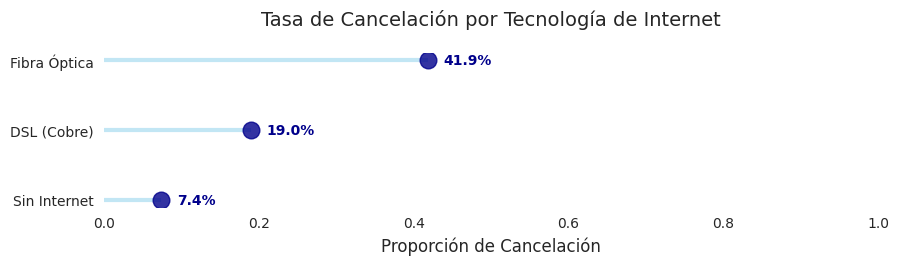

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Preparación de datos (agrupamos y traducimos)
traduccion_internet = {
    'Fiber optic': 'Fibra Óptica',
    'DSL': 'DSL (Cobre)',
    'No': 'Sin Internet'
}

data_plot = (
    df[df['Cancelacion'].isin([0, 1])]
    .groupby('Tipo_internet')['Cancelacion']
    .mean()
    .sort_values(ascending=True)
)
data_plot.index = data_plot.index.map(traduccion_internet)

plt.figure(figsize=(10, 2))
sns.set_style("white")

plt.hlines(y=data_plot.index, xmin=0, xmax=data_plot.values, color='skyblue', alpha=0.5, linewidth=3)

plt.plot(data_plot.values, data_plot.index, "o", markersize=12, color='darkblue', alpha=0.8)


for i, valor in enumerate(data_plot.values):
    plt.text(valor + 0.02, i, f'{valor*100:.1f}%', va='center', fontweight='bold', color='darkblue')

plt.title('Tasa de Cancelación por Tecnología de Internet', fontsize=14, pad=20)
plt.xlabel('Proporción de Cancelación', fontsize=12)
plt.xlim(0, 1)
plt.grid(False)
sns.despine(left=True, bottom=True)

plt.show()

### Distribución de cancelación de clientes en pareja.

In [ ]:

pareja_propension = (
    df.groupby('Tiene_pareja')['Cancelacion']
      .value_counts(normalize=True)
      .unstack()
)

pareja_propension.index = pareja_propension.index.map({
    0: 'Sin Pareja',
    1: 'Con Pareja'
})

pareja_propension.columns = ['No Desertó', 'Desertó']

pareja_propension


,No Desertó,Desertó
Tiene_pareja,,
Sin Pareja,0.670239,0.329761
Con Pareja,0.802829,0.197171


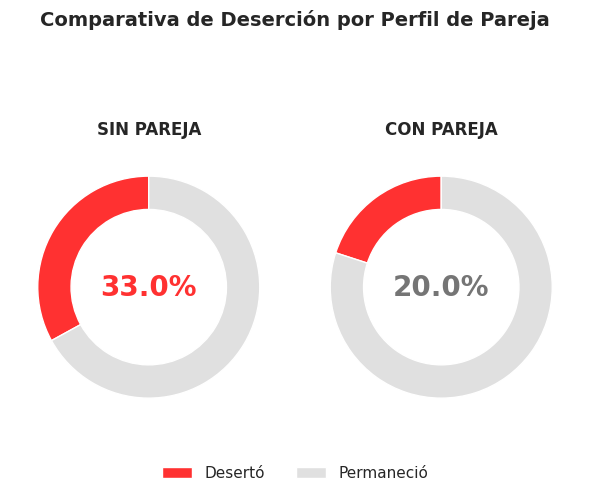

In [ ]:
import matplotlib.pyplot as plt

colores = ['#FF3131', '#E0E0E0']
sin_pareja = [0.33, 0.67]
con_pareja = [0.20, 0.80]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 5))

# Donut sin pareja
ax1.pie(sin_pareja, colors=colores, startangle=90, wedgeprops={'width': 0.3, 'edgecolor': 'w'})
ax1.annotate('33.0%', xy=(0, 0), fontsize=20, fontweight='bold', ha='center', va='center', color='#FF3131')
ax1.set_title('SIN PAREJA', weight='bold', pad=10)

# Donut con pareja
ax2.pie(con_pareja, colors=colores, startangle=90, wedgeprops={'width': 0.3, 'edgecolor': 'w'})
ax2.annotate('20.0%', xy=(0, 0), fontsize=20, fontweight='bold', ha='center', va='center', color='#757575')
ax2.set_title('CON PAREJA', weight='bold', pad=10)

fig.legend(['Desertó', 'Permaneció'], loc='lower center', ncol=2,
           frameon=False, fontsize=11, bbox_to_anchor=(0.5, 0.05))

plt.suptitle('Comparativa de Deserción por Perfil de Pareja',
             fontsize=14, weight='bold', y=1.02)

plt.tight_layout()
plt.show()

### Evasión por variables númericas.

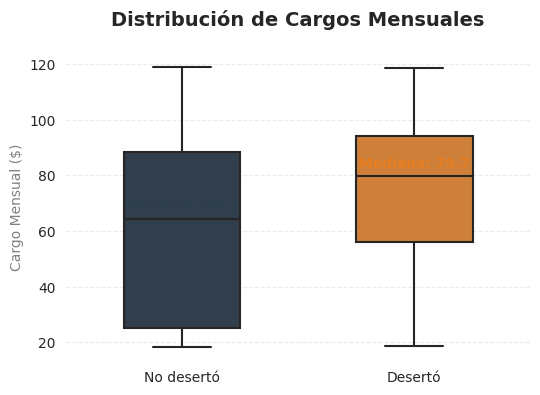

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df_plot = df.copy()
df_plot['Status'] = df_plot['Cancelacion'].map({0: 'No desertó', 1: 'Desertó'})

sns.set_style("white")
plt.figure(figsize=(6, 4))

colores = {'No desertó': '#2c3e50', 'Desertó': '#e67e22'}

ax = sns.boxplot(
    data=df_plot,
    x='Status',
    y='Cargos_mensuales',
    palette=colores,
    width=0.5,
    showfliers=False,
    linewidth=1.5
)

medianas = df_plot.groupby('Status')['Cargos_mensuales'].median()
for i, status in enumerate(['No desertó', 'Desertó']):
    ax.text(
        i, medianas[status] + 2, f'Mediana: {medianas[status]:.1f}',
        ha='center', va='bottom', fontweight='bold',
        color=colores[status], fontsize=10
    )

plt.title('Distribución de Cargos Mensuales', fontsize=14, weight='bold', pad=20, loc='center')
plt.ylabel('Cargo Mensual ($)', color='gray', fontsize=10)
plt.xlabel('')

sns.despine(left=True, bottom=True)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tick_params(bottom=False)

plt.show()


--- RESUMEN DE ESTADÍSTICAS POR ESTADO DE CANCELACIÓN ---
Cancelacion                        0            1
Antiguedad_meses mean      37.650010    17.979133
                 median    38.000000    10.000000
Cargos_mensuales mean      61.307408    74.441332
                 median    64.450000    79.650000
Cargos_totales   mean    2555.344141  1531.796094
                 median  1683.600000   703.550000
Costo_diario     mean       2.043580     2.481378
                 median     2.148333     2.655000
Ciudadano_mayor  mean       0.128995     0.254682
                 median     0.000000     0.000000


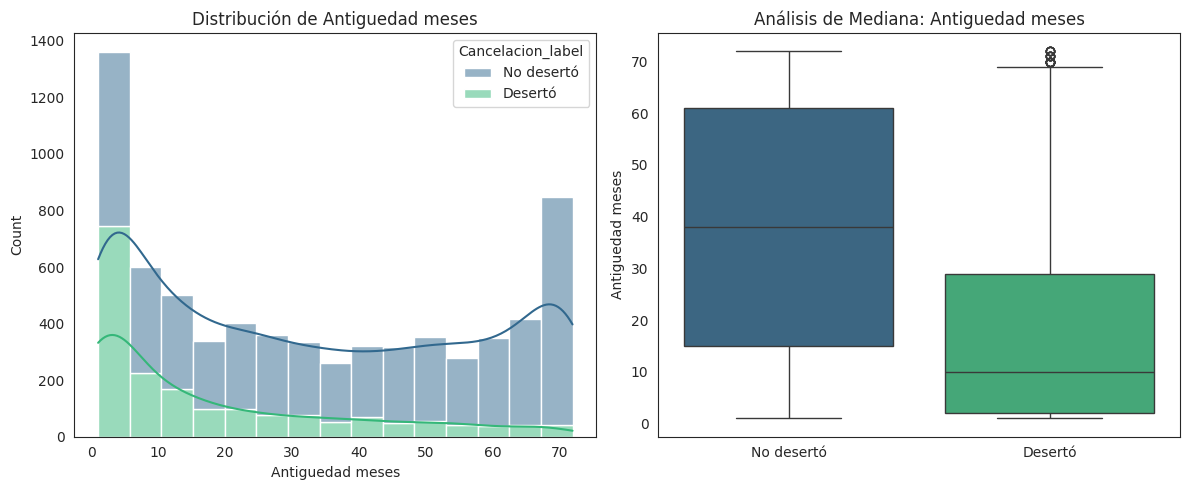

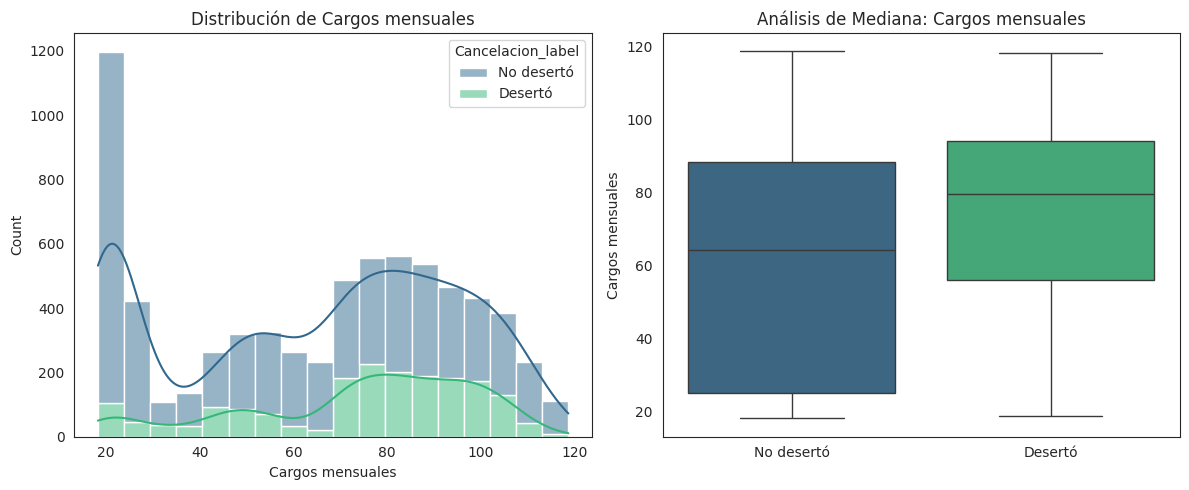

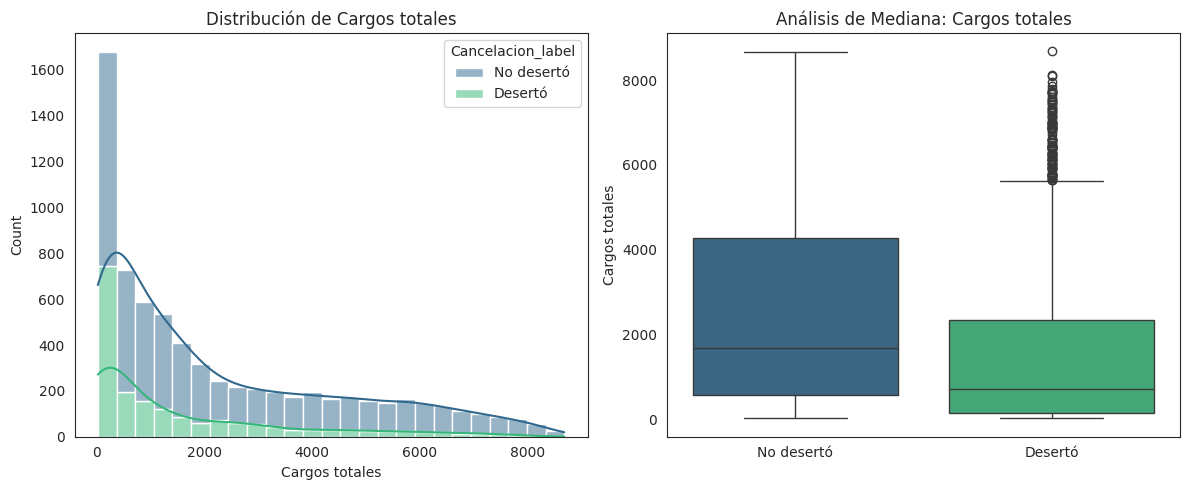

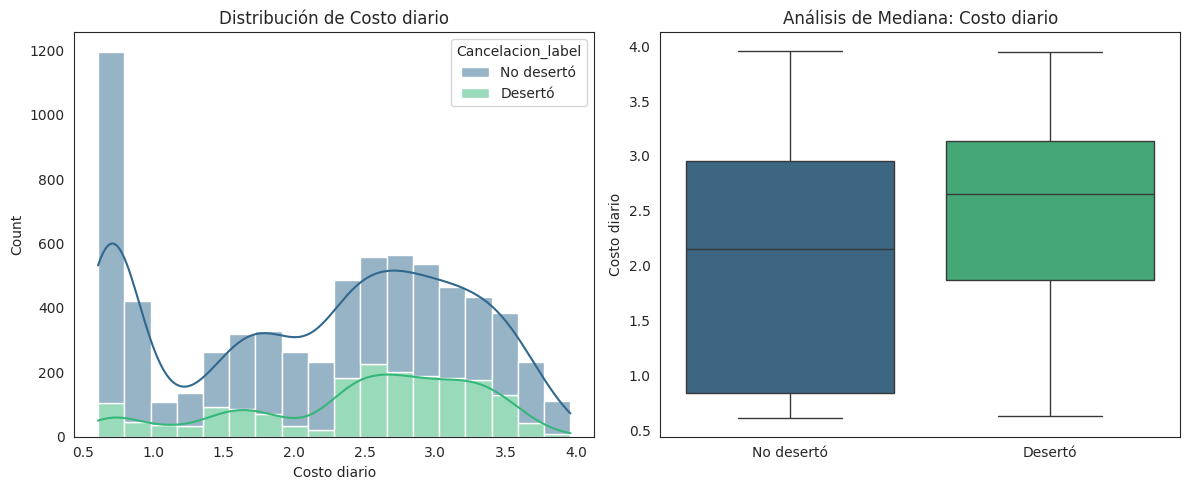

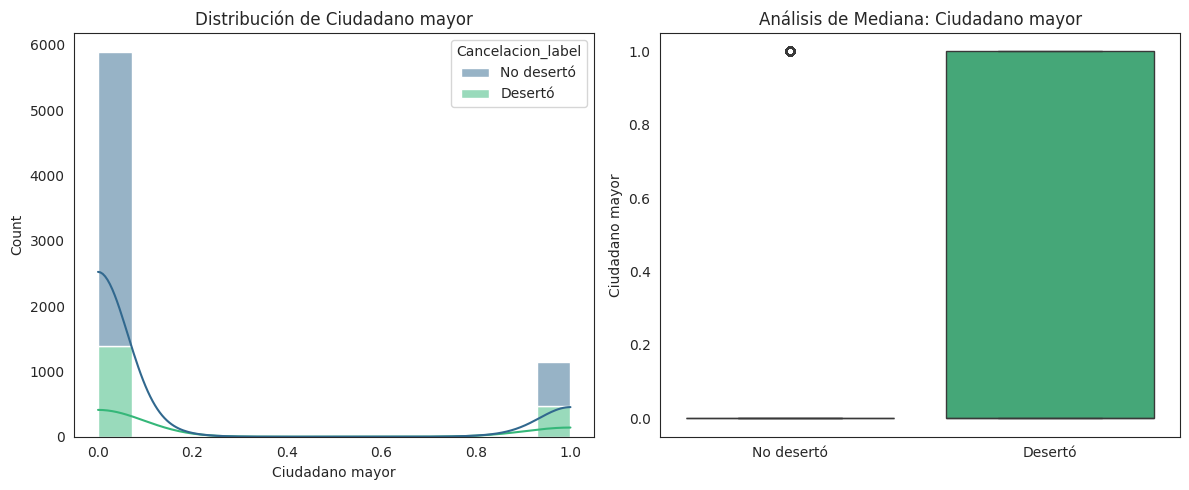

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df['Cancelacion_label'] = df['Cancelacion'].map({0: 'No desertó', 1: 'Desertó'})

numeric_cols = ['Antiguedad_meses', 'Cargos_mensuales', 'Cargos_totales', 'Costo_diario', 'Ciudadano_mayor']

print("\n--- RESUMEN DE ESTADÍSTICAS POR ESTADO DE CANCELACIÓN ---")
stats = df.groupby('Cancelacion')[numeric_cols].agg(['mean', 'median']).T
print(stats)

for col in numeric_cols:
    # Creamos la figura
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    col_name = col.replace("_", " ").capitalize()

    sns.histplot(data=df, x=col, hue='Cancelacion_label', multiple="stack",
                 kde=True, palette='viridis', ax=axes[0])
    axes[0].set_title(f'Distribución de {col_name}')
    axes[0].set_xlabel(col_name)

    sns.boxplot(data=df, y=col, x='Cancelacion_label', hue='Cancelacion_label',
                palette='viridis', ax=axes[1], legend=False)
    axes[1].set_title(f'Análisis de Mediana: {col_name}')
    axes[1].set_ylabel(col_name)
    axes[1].set_xlabel('')

    plt.tight_layout()
    plt.show()

#📄Informe final

### 🔹Introduccion

El objetivo de este análisis es identificar los factores que influyen en la cancelación del servicio 'Telecom X', con el fin de diseñar estrategias que permitan reducir la tasa de abandono y mejorar la rentabilidad del negocio.

###🔹 Limpieza y Tratamiento de datos

**Estructuración y Normalización**: Se desglosaron las estructuras anidadas del JSON original mediante pd.json_normalize, consolidando un DataFrame plano.

**Tratamiento de Valores Faltantes e Inconsistencias**:  Se eliminaron registros con espacios vacíos en la variable objetivo (Churn) por representar clientes sin historial suficiente.

**Codificación y Transformación:Variable Objetivo**:
Se aplicó una codificación binaria a Churn (0 para "No", 1 para "Yes") y se creó la métrica "Cuentas_diarias" para analizar el gasto diario promedio por cliente.

**Renombramiento** de columnas de inglés a español para mejorar la legibilidad.

### 🔹 Análisis exploratorio de datos

**Distribicción de las cancelaciones**: Se observa una distribución de la variable objetivo donde la permanencia predomina con un **73.5%**, frente a un **26.5%** de casos confirmados de churn (cancelación). Cabe destacar que el mayor volumen de deserción ocurre de manera prematura, específicamente durante los primeros **6 meses** de servicio.

**Cancelación por tipo de contrato y servicio**: El uso de Fibra Óptica y los contratos mes a mes son los principales predictores de deserción **(42.7%)**.

**Cancelación por género**: El género es una variable neutral con un impacto irrelevante en la deserción de clientes.

**Cancelación por método de pago**: La facturación electrónica muestra una correlación inusualmente en comparación con las transferencias automáticas.

**Cancelación de clientes en pareja**: Los análisis muestran que los clientes solteros desertaron un **33%** más que aquellos que están en pareja **(19.7%)**.



### 🔹 Conclusiones e Insights

⭐ El riesgo de abandono es crítico durante los primeros 6 meses y disminuye drásticamente a medida que el cliente gana antigüedad.

⭐ La volatilidad de los planes mensuales genera un churn mucho mayor que la estabilidad de los contratos a 1 o 2 años.

⭐ La fibra óptica y la facturación digital presentan un riesgo mas alto de desercion a pesar de ser opciones modernas.

⭐ El cheque electrónico se destaca como un método de pago asociado a una alta tasa de cancelación.


### 🔹 Recomendaciones estratégicas

✅ Ofrecer descuentos o beneficios que se activen solo después del séptimo mes, creando un incentivo psicológico para cruzar la barrera crítica de los 6 meses.

✅ Incentivar a los usuarios mensuales a migrar a contratos anuales mediantre promociones o  beneficios exclusivos.

✅ Dado que el cheque electrónico correlaciona con la cancelación, ofrece un descuento pequeño pero permanente (ej. 5%) si el cliente vincula su tarjeta para débito automático.

✅ Seguimiento minucioso a clientes de fibra óptica.
